<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-corvus18/blob/main/Actividad_Semanal_6_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad Semanal 6: Visualización
Alumno: Felipe de Jesus Gastelum Lizarraga - A01114918

Profesora: María de la Paz Rico Fernández

01/11/2022

In [1]:
#Importando Librerias

import pandas as pd
import numpy as np
import matplotlib as plt

import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
#1- Imporando Datos
db = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')

#Renombramiento de Columnas
db.rename(columns={'X1':'Amount_credit','X2':'Gender','X3':'Education','X4':'Marital_status','X5':'Age','Y':'Prob'}, inplace=True)

db_org = db

In [4]:
#Obteniendo Información de los Datos
print("\033[1m Primeros 5 registros: \033[0m \n",db.head(),"\n\n\n")
print("\033[1m Forma/Shape: \033[0m \n",db.shape,"\n\n\n")
print("\033[1m Columnas: \033[0m \n",db.columns,"\n\n\n")
print("\033[1m Tipo de Datos: \033[0m \n",db.dtypes,"\n\n\n")
print("\033[1m Infedinidos x Variable: \033[0m \n",db.isna().sum(),"\n\n\n")
print("\033[1m Información General: \033[0m \n")
db.info()

 Primeros 5 registros:  
    ID  Amount_credit  Gender  Education  Marital_status   Age   X6   X7   X8  \
0   1          20000     2.0        2.0             1.0  24.0  2.0  2.0 -1.0   
1   2         120000     2.0        2.0             2.0  26.0 -1.0  2.0  0.0   
2   3          90000     2.0        2.0             2.0  34.0  0.0  0.0  0.0   
3   4          50000     2.0        2.0             1.0  37.0  0.0  0.0  0.0   
4   5          50000     1.0        2.0             1.0  57.0 -1.0  0.0 -1.0   

    X9  ...      X15      X16      X17     X18      X19      X20     X21  \
0 -1.0  ...      0.0      0.0      0.0     0.0    689.0      0.0     0.0   
1  0.0  ...   3272.0   3455.0   3261.0     0.0   1000.0   1000.0  1000.0   
2  0.0  ...  14331.0  14948.0  15549.0  1518.0   1500.0   1000.0  1000.0   
3  0.0  ...  28314.0  28959.0  29547.0  2000.0   2019.0   1200.0  1100.0   
4  0.0  ...  20940.0  19146.0  19131.0  2000.0  36681.0  10000.0  9000.0   

      X22     X23  Prob  
0     0.0 

In [5]:
#3 - Limpiar Datos

db = db.dropna()

In [6]:
#4 - Estadistica Descriptiva
db.describe()

,ID,Amount_credit,Gender,Education,Marital_status,Age,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Prob
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### **Medidas de Tendencia Central:**
Buscan explicar un conjunto de datos mediante un valor que mejor los represente. Estas metricas estan basados en la tendencia central de la información. Algunas de las medidas mas utilizadas son: media(mean), mediana(median) y moda(mode)

### **Medidas de Dispersión:**
Buscan explicar el nivel de variabilidad o dispersión de un conjunto de datos, es decir, en que grado los datos son diferentes entre si. Algunas de las medidas mas utilizadas son: Desviación Estandard(standard desviation) y Varianza(Variance)

In [7]:
#5 - Indentificando Variables Categoricas
col_cat=['ID','Gender','Marital_status','X6','X7','X8','X9','X10','X11','Education','Prob']
print("\033[1m Numero de Variables Categoricas: \033[0m ",len(col_cat))

print("\033[1m Lista: \033[0m",col_cat)

 Numero de Variables Categoricas:   11
 Lista:  ['ID', 'Gender', 'Marital_status', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Education', 'Prob']


In [8]:
#Eliminar variables categoricas

db = db.drop(columns = col_cat)

db

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [9]:
#Escalameinto de Datos
db = (db - db.mean())/db.std()

In [10]:
#Mostrar datos escalados
db

,Amount_credit,Age,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137344,-1.246261,-0.642486,-0.647349,-0.667914,-0.672408,-0.663020,-0.652703,-0.341884,-0.227130,-0.296778,-0.308102,-0.314119,-0.293480
1,-0.366555,-1.029207,-0.659194,-0.666685,-0.639190,-0.621573,-0.606219,-0.597973,-0.341884,-0.213642,-0.240015,-0.244311,-0.314119,-0.181051
2,-0.597792,-0.160993,-0.298733,-0.493932,-0.482428,-0.449755,-0.417270,-0.391739,-0.250266,-0.191955,-0.240015,-0.244311,-0.248698,-0.012407
3,-0.906107,0.164587,-0.057796,-0.013586,0.032552,-0.232508,-0.186926,-0.156806,-0.221175,-0.169445,-0.228663,-0.237932,-0.244184,-0.237265
4,-0.906107,2.335122,-0.578638,-0.611287,-0.161380,-0.347074,-0.348254,-0.331621,-0.221175,1.333939,0.270845,0.266016,-0.269044,-0.255310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404233,0.381640,1.869019,2.016740,2.325172,0.694863,-0.149475,-0.384505,0.171128,0.610440,-0.012796,-0.113731,0.012987,-0.237265
29996,-0.135319,0.815747,-0.672754,-0.665239,-0.627372,-0.532906,-0.577695,-0.652703,-0.231013,-0.104082,0.213969,-0.299873,-0.314119,-0.293480
29997,-1.060265,0.164587,-0.647209,-0.643782,-0.638095,-0.348038,-0.324646,-0.327828,-0.341884,-0.257014,0.951992,-0.040180,-0.183276,-0.119215
29998,-0.674871,0.598694,-0.717925,0.409746,0.421871,0.147514,-0.468120,0.168741,4.842552,-0.109157,-0.229912,-0.185241,3.150852,-0.192069


In [11]:
#7 - Aplicando PCA / Obteniendo Principales Componentes
pcs = PCA()
pcs.fit(db.iloc[:, :])
pcs_res = pd.DataFrame({'Desviación Estandar': np.sqrt(pcs.explained_variance_),
                             'Proporción de Varianza': pcs.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcs_res = pcs_res.transpose()
pcs_res.columns = ['PC{}'.format(i) for i in range(1, len(pcs_res.columns) + 1)]
pcs_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación Estandar,2.432880,1.309860,1.022252,0.961860,0.940071,0.934225,0.882969,0.852424,0.841027,0.514240,0.266465,0.202641,0.159178,0.15246
Proporción de Varianza,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.001810,0.00166
Proporción Acumulada,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.998340,1.00000


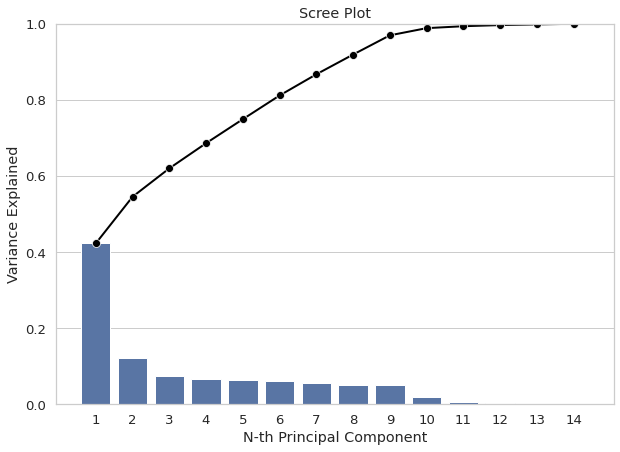

In [12]:

PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [13]:
(pcs_res.iloc[1][0:5]*100).sum().round(2)

74.92

La suma de los componentes PC1 - PC5 representan el 74% de la varianza total de los datos

In [14]:
#Impotancia de Cada Variable en los Componentes Seleccionados

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcs_res.columns,
                                index = db.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Amount_credit,0.165507,0.300709,-0.378575,-0.200103,0.035312
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164
X14,0.388264,-0.126883,0.034747,0.060528,0.113790
X15,0.391557,-0.120403,0.034073,0.074774,0.028378
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986
X18,0.135120,0.383194,0.173845,0.362055,0.225652
X19,0.116768,0.408391,0.200925,0.345745,0.148714


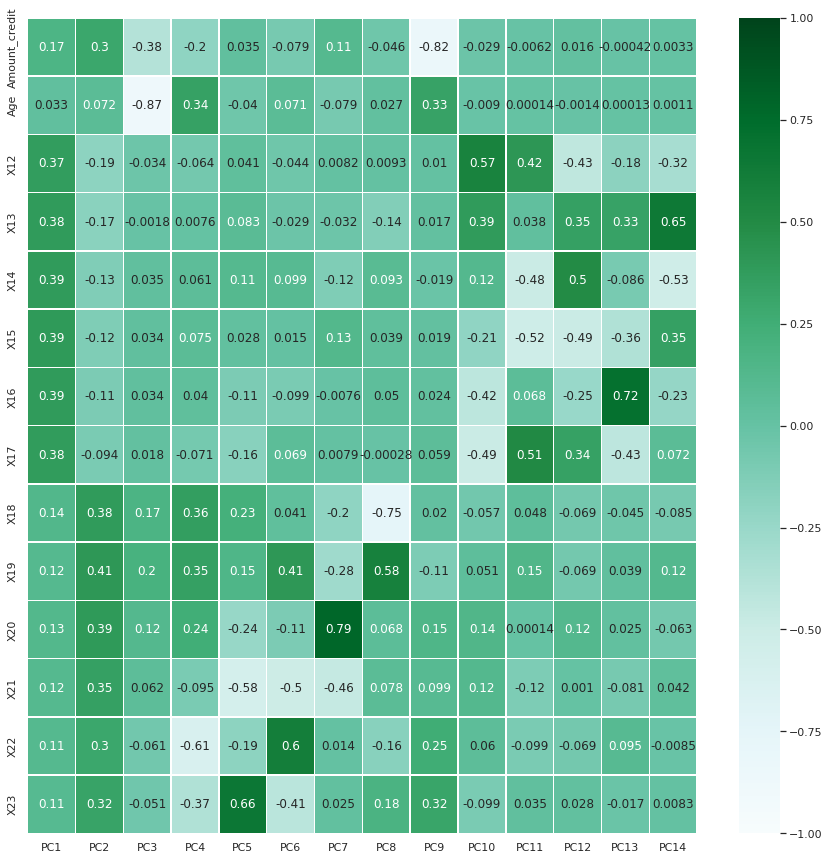

In [15]:

sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(pcsComponents_df, vmin = -1, vmax = 1, cmap = "BuGn", annot= True,linewidths=.5)

Los Atributos mas importantes son: Amount of Credit, X20,X22,X23,X14

Amount_credit


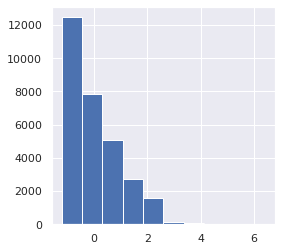

Age


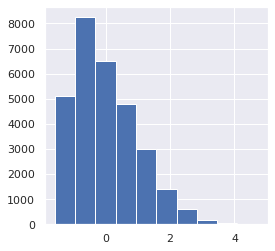

X12


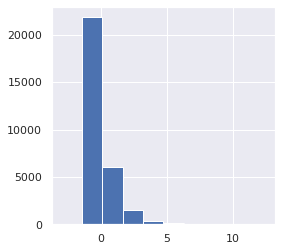

X13


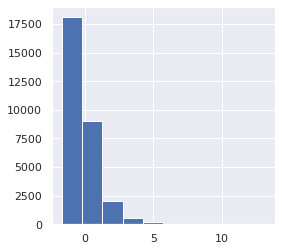

X14


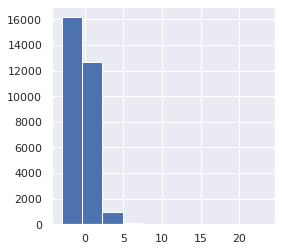

In [16]:
#8 - Histogramas de los atributos

col_feat = ['Amount_credit','Age','X12','X13','X14']

for cl in col_feat:
  print(cl)
  plt.figure(figsize=(4,4))
  plt.hist(db[cl])
  plt.show()


In [19]:
db_org

,ID,Amount_credit,Gender,Education,Marital_status,Age,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Prob
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


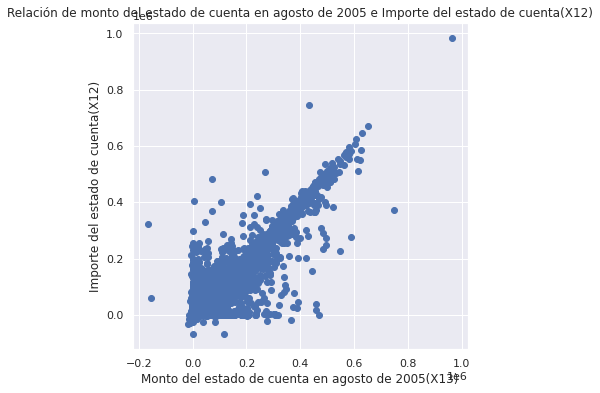


  Explicación:  Hay una clara correlación entre X12 y X13, debido a que son proporcionales, al momento de 
 generar un modelo de prediccion una de ellas podria omitirse
 ya que la variabilidad de una esta relacionada con la otra.






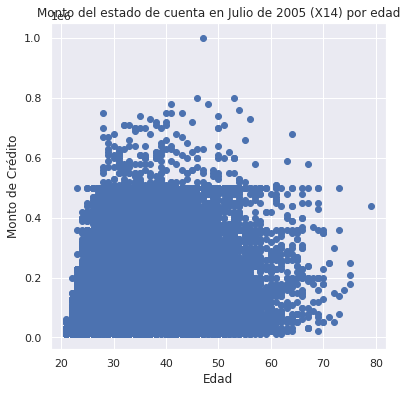


  Explicación:   Aparentemente no hay una clara relación entre el monto del crédito y la edad de la persona. Sin embargo, se puede ver como 
 en el intervalo de edad de 20 a 25 el monto prestado tiende a subir hasta llegar 
 a un punto(25 o mas) en donde deja de subir acorde a la edad 

 




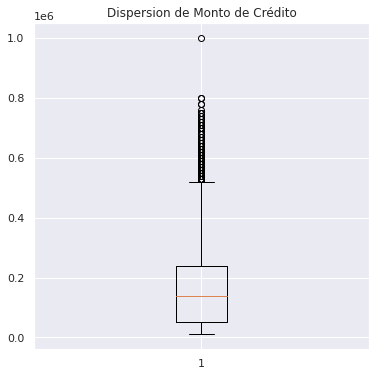


  Explicación:  Los montos prestados se encuentran entre $50,000 - 240,000 (Primer y tercer cuartil), 
existen datos atipicos cuyos montos son de 500,000 o mas, sinedo un millon el monto maximo 

 




In [94]:
#9 - Visualización de los datos 
plt.figure(figsize=(6,6))
plt.title("Relación de monto del estado de cuenta en agosto de 2005 e Importe del estado de cuenta(X12)")
plt.xlabel('Monto del estado de cuenta en agosto de 2005(X13)')
plt.ylabel('Importe del estado de cuenta(X12)')
plt.scatter(db_org['X12'],db_org['X13'])
plt.show()
print("\n \033[1m Explicación: \033[0m Hay una clara correlación entre X12 y X13, debido a que son proporcionales, al momento de \n generar un modelo de prediccion una de ellas podria omitirse\n ya que la variabilidad de una esta relacionada con la otra.\n\n\n\n")

plt.figure(figsize=(6,6))
plt.ylabel('Monto de Crédito')
plt.xlabel('Edad')
plt.title("Monto del estado de cuenta en Julio de 2005 (X14) por edad")
plt.scatter(db_org['Age'],db_org.Amount_credit)
plt.show()
print("\n \033[1m Explicación: \033[0m  Aparentemente no hay una clara relación entre el monto del crédito y la edad de la persona. Sin embargo, se puede ver como \n en el intervalo de edad de 20 a 25 el monto prestado tiende a subir hasta llegar \n a un punto(25 o mas) en donde deja de subir acorde a la edad \n\n \n\n")

plt.figure(figsize=(6,6))
plt.title('Dispersion de Monto de Crédito')
plt.boxplot(db.Amount_credit)
plt.show()
print("\n \033[1m Explicación: \033[0m Los montos prestados se encuentran entre $50,000 - 240,000 (Primer y tercer cuartil), \nexisten datos atipicos cuyos montos son de 500,000 o mas, sinedo un millon el monto maximo \n\n \n\n")
